Train-Test Split

In [1]:
import pandas as pd
df_main = pd.read_csv("avito_pfm_transformed.csv")
df_main.head()

,Prix,kilometrage,Marque,Modèle,NBporte,Origine,Première main,Puissance fiscale,Etat,Age,...,Airbags,Caméra de recul,Système de navigation/GPS,Radar de recul,ESP,ABS,Ordinateur de bord,Régulateur de vitesse,Sièges cuir,Toit ouvrant
0,-0.151360,-1.066511,47,209,5,1.0,0.0,-0.741243,1,-1.089479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001832,-0.324056,14,195,5,1.0,0.0,-0.741243,3,-0.952440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.277578,-0.076571,26,462,5,1.0,0.0,-0.741243,2,-0.541324,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-0.304551,0.913370,47,162,5,1.0,1.0,-0.741243,3,0.280909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.194253,0.294657,20,219,5,3.0,0.0,-0.741243,3,-0.130207,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [2]:
# Separating target variable and its features
y = df_main['Prix']
X = df_main.drop('Prix',axis=1)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14058, 31)
x test:  (3515, 31)
y train:  (14058,)
y test:  (3515,)


In [5]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [6]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Linear Regression 

Train R2-score : 0.36
Test R2-score : 0.46
Train CV scores : [0.53296916 0.52005223 0.45806363 0.13235653 0.42662543]
Train CV mean : 0.41


C:\Users\khadi\AppData\Local\Temp\ipykernel_13144\224628823.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


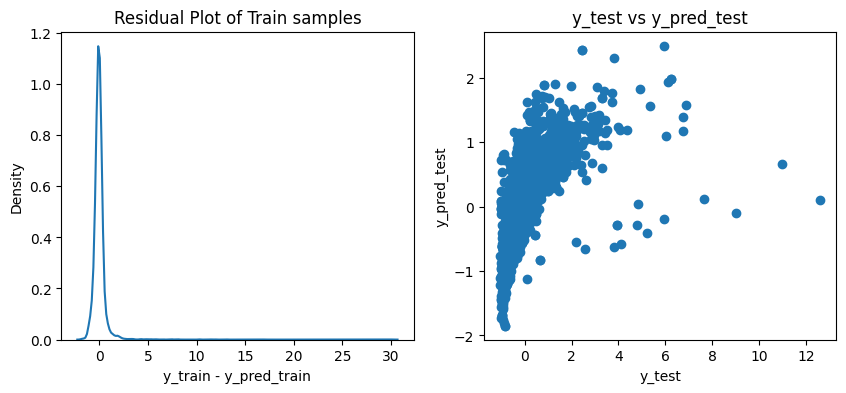

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Ridge

Train R2-score : 0.36
Test R2-score : 0.46
Train CV scores : [0.53277569 0.52034464 0.45852307 0.13297119 0.42570057]
Train CV mean : 0.41


C:\Users\khadi\AppData\Local\Temp\ipykernel_13144\224628823.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


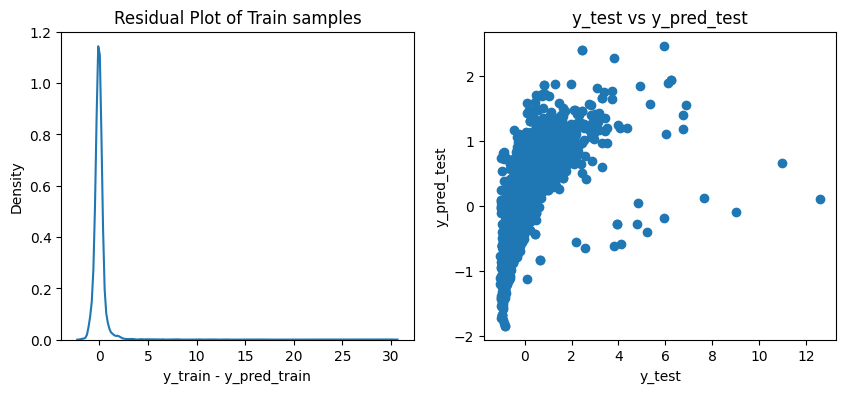

In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Lasso

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.36
Test R2-score : 0.46
Train CV scores : [0.53250321 0.52125357 0.45859834 0.13238858 0.4256358 ]
Train CV mean : 0.41


C:\Users\khadi\AppData\Local\Temp\ipykernel_13144\224628823.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


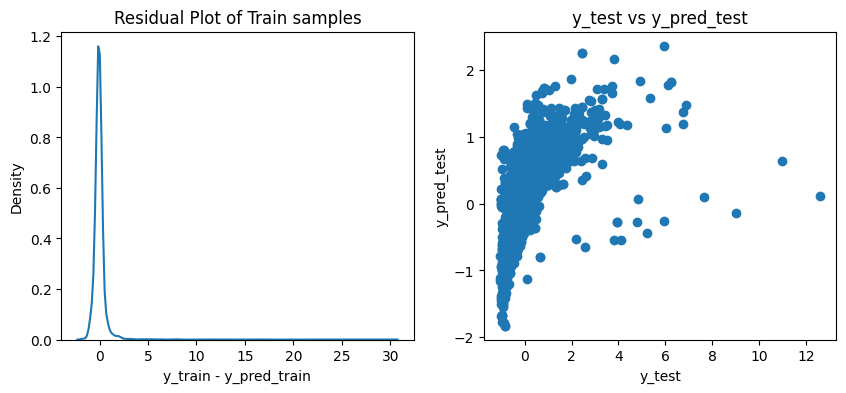

In [11]:
car_pred_model(ls_rs,"lasso.pkl")

Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,                                                                                              
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Train R2-score : 0.52
Test R2-score : 0.58
Train CV scores : [0.70044137 0.64015321 0.59375078 0.19838737 0.5702205 ]
Train CV mean : 0.54


C:\Users\khadi\AppData\Local\Temp\ipykernel_13144\224628823.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


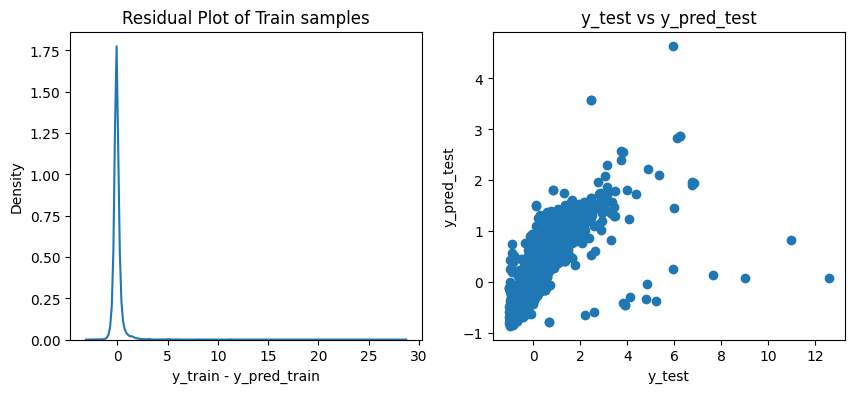

In [13]:
car_pred_model(rf_rs,'random_forest.pkl')

Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\khadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Train R2-score : 0.99
Test R2-score : 0.82
Train CV scores : [0.84166829 0.79918294 0.83242507 0.27509812 0.94394447]
Train CV mean : 0.74


C:\Users\khadi\AppData\Local\Temp\ipykernel_13144\224628823.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


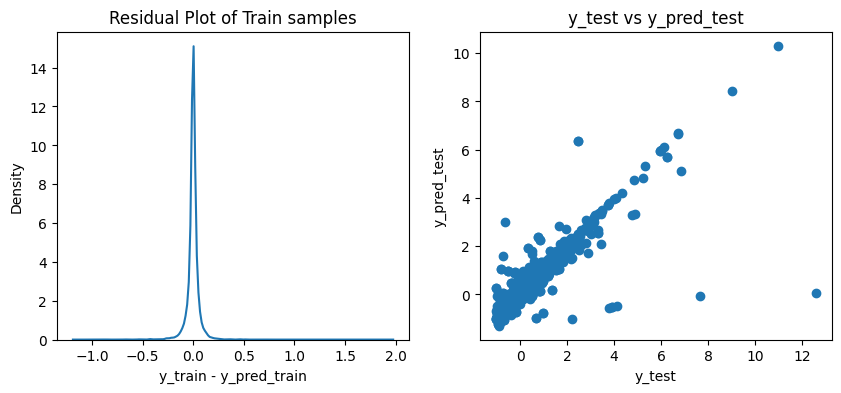

In [15]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

XGBRegressor

In [16]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=0)

# Hyperparameter space
param_grid = {
    "n_estimators": list(range(100, 1000, 100)),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": list(range(3, 10, 2)),
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3]
}

# Search
xgb_rs = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                            n_iter=50, cv=5, verbose=1, random_state=0, n_jobs=-1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train R2-score : 0.99
Test R2-score : 0.79
Train CV scores : [0.82539005 0.76353909 0.85226712 0.27444311 0.89076833]
Train CV mean : 0.72


C:\Users\khadi\AppData\Local\Temp\ipykernel_13144\224628823.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])


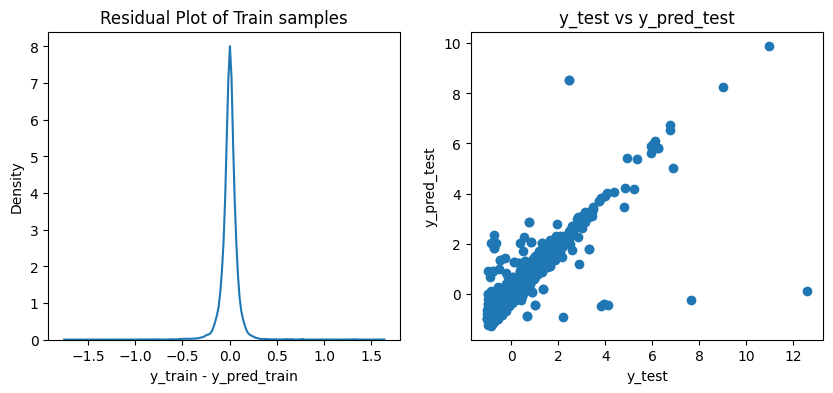

In [17]:
# Entraînement + sauvegarde avec ta fonction
car_pred_model(xgb_rs, "xgboost_model.pkl")

In [18]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor","XGBRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.36,0.46,0.41
1,Ridge,0.36,0.46,0.41
2,Lasso,0.36,0.46,0.41
3,RandomForestRegressor,0.52,0.58,0.54
4,GradientBoostingRegressor,0.99,0.82,0.74
5,XGBRegressor,0.99,0.79,0.72


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Créer le modèle
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraîner le modèle avec les données d'entraînement
gbr_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prédictions sur le test
y_pred = gbr_model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", round(mae, 2))
print("RMSE :", round(rmse, 2))
print("R² :", round(r2, 2))


MAE : 0.22
RMSE : 0.54
R² : 0.62


In [21]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso", "Random Forest", "Gradient Boosting"],
    "Train R²": [0.36, 0.36, 0.36, 0.61, 0.99],
    "Test R²": [0.46, 0.46, 0.46, 0.59, 0.82],
    "CV Mean": [0.41, 0.41, 0.41, 0.51, 0.73]
})
print(results)


               Model  Train R²  Test R²  CV Mean
0  Linear Regression      0.36     0.46     0.41
1              Ridge      0.36     0.46     0.41
2              Lasso      0.36     0.46     0.41
3      Random Forest      0.61     0.59     0.51
4  Gradient Boosting      0.99     0.82     0.73


In [22]:
from sklearn.model_selection import cross_val_score

# Recalcul sur Gradient Boosting
cv_scores = cross_val_score(gbr_model, X_train, y_train, scoring='r2', cv=5)

print("Validation croisée R² :", cv_scores)
print("Moyenne :", round(cv_scores.mean(), 2))
print("Écart-type :", round(cv_scores.std(), 2))


Validation croisée R² : [0.77198195 0.71931883 0.62567625 0.20399967 0.64633014]
Moyenne : 0.59
Écart-type : 0.2


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 4, 6]
}

gbr = GradientBoostingRegressor()
random_search = RandomizedSearchCV(gbr, param_distributions=params, cv=5, scoring='r2', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", round(random_search.best_score_, 2))

# Utilise ce modèle optimisé ensuite
gbr_model = random_search.best_estimator_


Best Parameters: {'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 4, 'learning_rate': 0.1}
Best CV Score: 0.61
